# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [3]:
print(list(df.columns)) # view feature names

['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?


1. World Happiness Report (`WHR2018Chapter2OnlineData.csv`)

2. I will be predicting the "Life Ladder" score, which represents individuals’ self-reported life satisfaction on a scale from 0 to 10.
This column is a numerical continuous variable, making it suitable for a regression task. "Life Ladder" is the label.


3. This is a supervised learning problem, and it's a regression task because the label (Life Ladder) is a continuous number.

4. The features are:
['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']

5. 
Life satisfaction is a key indicator of national wellbeing, predicting the life ladder scores helps governments and non-profits better understand the key drivers of happiness across populations. By identifying which factors — such as income, social support, health, etc. policy makers can target investments more effectively and design policies that maximize societal happiness, sudch as allocate resources and target areas to improve happiness.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

(1562, 19)
country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by count

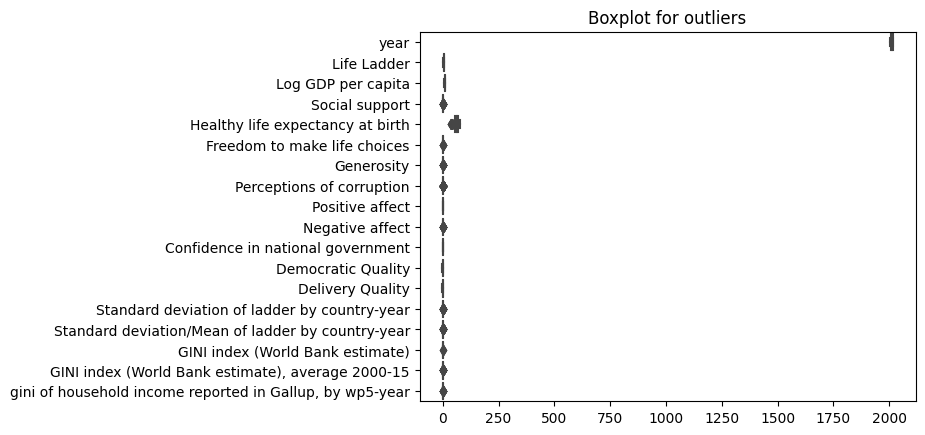

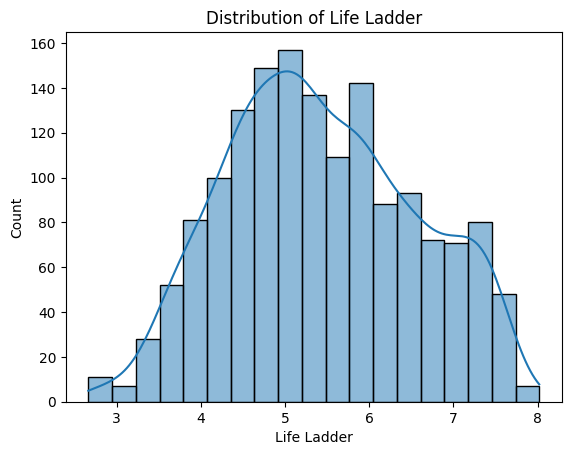

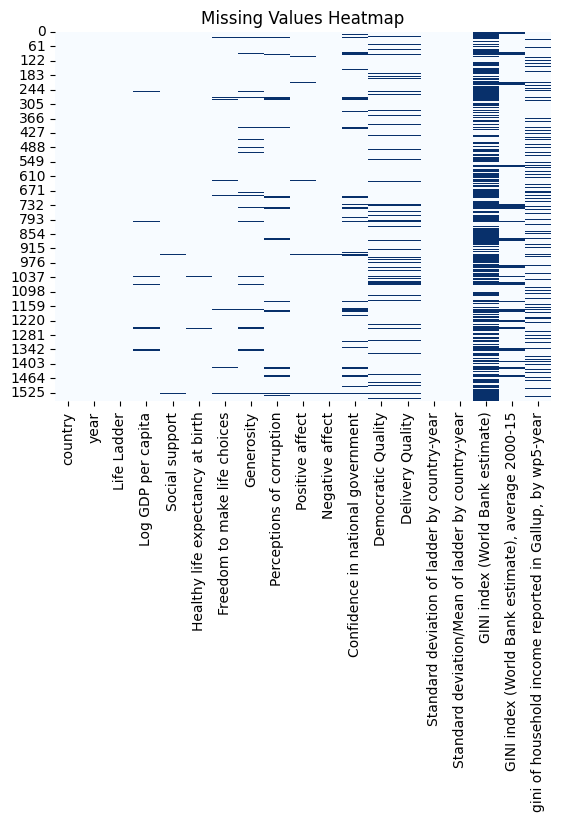

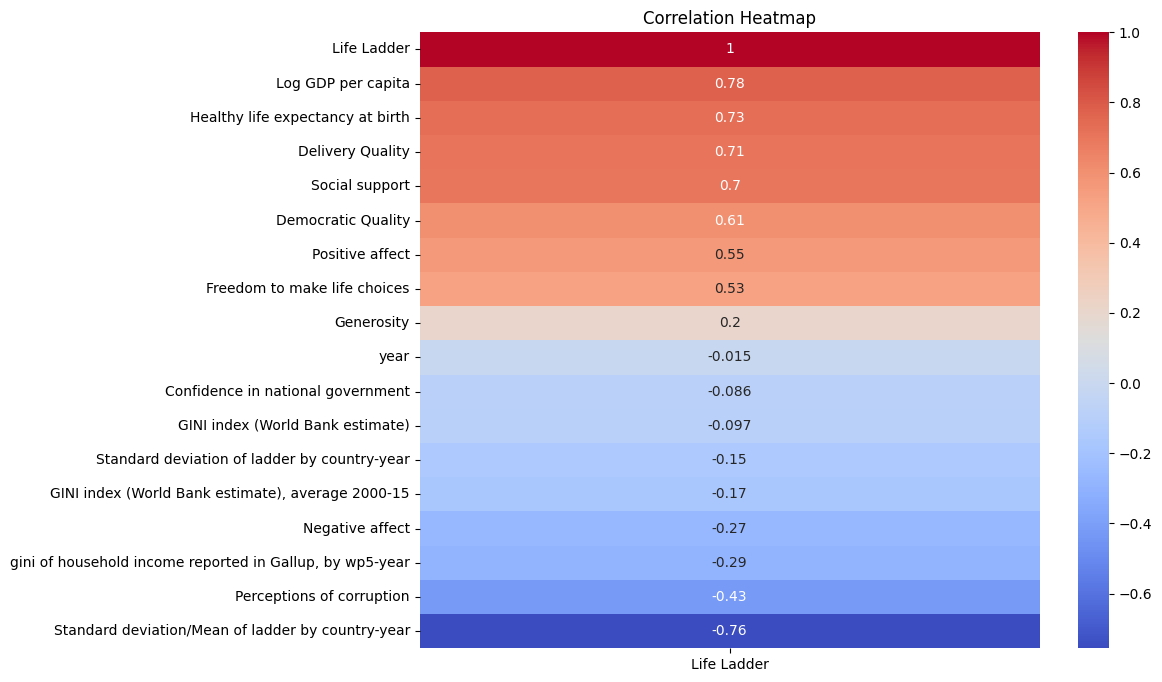

In [4]:
print(df.shape)
print(df.dtypes)
print(df.describe())

print("Missing values per column:\n", df.isnull().sum())

df_clean = df.dropna(subset=['Life Ladder'])

#outliers
sns.boxplot(data=df.select_dtypes(include='number'), orient='h')
plt.title('Boxplot for outliers')
plt.show()

sns.histplot(df['Life Ladder'], kde=True)
plt.title("Distribution of Life Ladder")
plt.xlabel('Life Ladder')
plt.show()


# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.title('Missing Values Heatmap')
plt.show()


# Correlation heatmap
plt.figure(figsize=(10,8))
correlation = df.corr()
sns.heatmap(correlation[['Life Ladder']].sort_values(by='Life Ladder', ascending=False), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()

Note:

There are missing values in several features. GINI index (world bank estimate) has over 900+ missing values, which means it should be dropped. Other missing values can be imputed using the mean. The target variable life_ladder follows an approximately normal distribution with a slight left skew. Most countries have scores between 5 and 6.5, while a few outliers exist on both extremes, representing extreme levels of happiness. 

The strongest positive correlations with life_ladder include GDP,life expectancy, and governance-related indicators (delivery quality, democracy). These suggest a clear link between institutional and economic well-being and perceived happiness.
On the negative side, perceived corruption, income inequality, and negative emotions are inversely related to happiness. This reinforces the societal importance of fairness, equity, and emotional well-being.

Interestingly, the feature `Standard deviation/Mean of ladder by country-year` shows the strongest negative correlation with happiness (r = -0.76). This feature represents the relative variability in happiness scores within each country-year pair. A high value implies high instability in perceived well-being, which is strongly associated with lower average happiness. While not directly interpretable like GDP or life expectancy, this feature reveals that societal stability in happiness perception may be crucial to overall well-being.


In [5]:
print(list(df.columns)) # new feature names

['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year']


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, I do have a new feature list. The features that I chose to keep after inspecting data are
   
- Log GDP per capita
- Social support
- healthy life expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Positive affect
- Negative affect
- Confidence in national government
- Democratic Quality
- Delivery Quality
- Standard deviation of ladder by country-year
- Standard deviation/Mean of ladder by country-year
- gini of household income reported in Gallup, by wp5-year
  
The features that I chose to drop are:
- country: a categorical feature with many unique values, not useful for this task.
- year: a temporal variable, not directly predictive of happiness and could introduce noise.
- GINI index (World Bank estimate), average 2000-15: had too many missing values.
- GINI index (World Bank estimate), with a lot of missing values, not easy to interpret, and a weak correlation (-0.097 in the correlation heatmap)

2. The Data Preparation Techniques that I used are

- Filled missing values in numeric columns with their mean
- Dropped columns with high missingness or useless.
- Dropped categorical and time-based columns (e.g., country, year)

3. Model(s) I plan to use

- Linear Regression
- Random Forest Regressor

4. Training, Validation & Improvement Plan

Feature engineering & preparation:
 - Drop columns that are not useful.
 - Impute missing numerics with means.
 - prepare X and y for modeling.
 - split the data

Modeling strategy:
 - Linear Regression, Decision Tress and Random Forest.
 - See their evalution metrics and take the best one

Validation & evaluation:
 - Train/test split (80/20).
 - 5-fold cross-validation on training set to assess overfitting.
 - Metrics: MAE, R².

Hyperparameter tuning:
 - GridSearchCV on Decision Trees and Random Forest.

Interpretability & diagnostics:
 - Feature importance

Final model:
- Retrain on full dataset, save model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [6]:

from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [7]:
# data cleaning + feature engineering
df = df.drop(columns=[
    'GINI index (World Bank estimate)', # high missing values
    'GINI index (World Bank estimate), average 2000-15', 
])

#country is a categorical feature, but its not too useful.
df = df.drop(columns=['country', 'year']) 

#renaming
df.rename(columns={
    'Healthy life expectancy at birth': 'life_expectancy',
    'Life Ladder': 'life_ladder'
}, inplace=True)

print(list(df.columns)) # check new feature names


# Impute missing values
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


['life_ladder', 'Log GDP per capita', 'Social support', 'life_expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'gini of household income reported in Gallup, by wp5-year']


In [8]:

#------------
# Split data
label='life_ladder'
X = df.drop(columns=[label])
y = df[label]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)



In [9]:
#---------
# Linear Regression with 5-fold CV
lr_model = LinearRegression()

cvs = cross_val_score(lr_model, X_train, y_train, 
                      cv=5, 
                      scoring='neg_mean_absolute_error')

print("Linear Regression CV MAE:", -cvs.mean())
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
print("LR Test MAE:", lr_mae)
print("LR Test R²:", lr_r2)
print()


Linear Regression CV MAE: 0.2100928889588841
LR Test MAE: 0.22052004740935754
LR Test R²: 0.9237587426280557



In [10]:
#-----
#Decision Tree
param_grid_dt = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeRegressor(random_state=123)
grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='neg_mean_absolute_error')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best Decision Tree params:", grid_dt.best_params_)

y_pred_dt = best_dt.predict(X_test)

dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree MAE:", dt_mae)
print("Decision Tree R²:", dt_r2)
print()

Best Decision Tree params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree MAE: 0.241747084886446
Decision Tree R²: 0.916902652657463



In [11]:
#--------
#Random Forest
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[2,5,10],
    'min_samples_split':[2,5]
}
rf = RandomForestRegressor(random_state=123)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print("Best RF params:", grid.best_params_)

best_rf = grid.best_estimator_

# Evaluate on test
y_pred_rf = best_rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print("RF Test MAE:", rf_mae)
print("RF Test R²:", rf_r2)
print()

Best RF params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
RF Test MAE: 0.15563502181910085
RF Test R²: 0.965271685911847



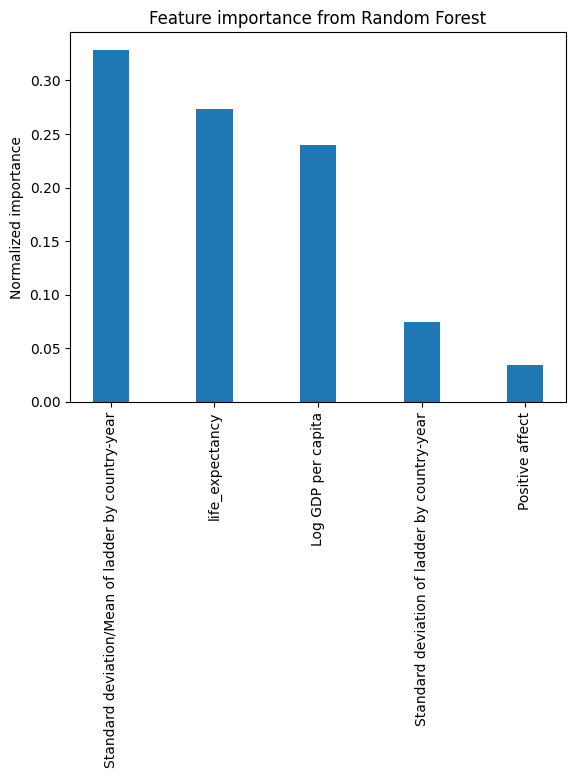

In [12]:
#----------
#feature importance for RF
feature_imp = best_rf.feature_importances_

# Create DataFrame
df_features = pd.DataFrame({
    'name': X.columns,  # Assuming X is a DataFrame with column names
    'imp': feature_imp
})

# Sort and get top 5
df_sorted = df_features.sort_values(by='imp', ascending=False)
top_five = df_sorted.iloc[:5]['name'].tolist()

# Visualization
fig, ax = plt.subplots()
ax.bar(np.arange(5), df_sorted.iloc[:5]['imp'], width=0.35)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(top_five, rotation=90)
plt.title('Feature importance from Random Forest')
ax.set_ylabel('Normalized importance')
plt.show()

One interesting observation from my project was that even though I tried different models and used GridSearchCV for hyperparameter tuning, the improvement in R² was minimal. However, when I revisited the earlier data visualization and correlation analysis, I noticed that I had dropped the feature 'Standard deviation/Mean of ladder by country-year', initially assuming it was noise. 

Surprisingly, this feature had a strong negative correlation with the target and turned out to be highly predictive. After adding it back, all of my model's R² score improved by over 10%.

This experience taught me that model performance improvements don't always come from more complex algorithms or better tuning — sometimes, going back to re-evaluate features through EDA can be more impactful. It reinforced the idea that machine learning is an iterative process, where insights at the data level are just as critical as modeling choices.